In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

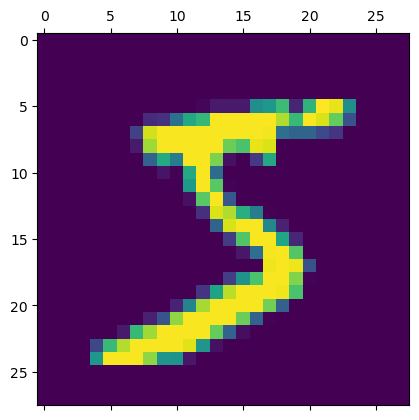

In [8]:
plt.matshow(x_train[0])

In [9]:
y_train[0]

5

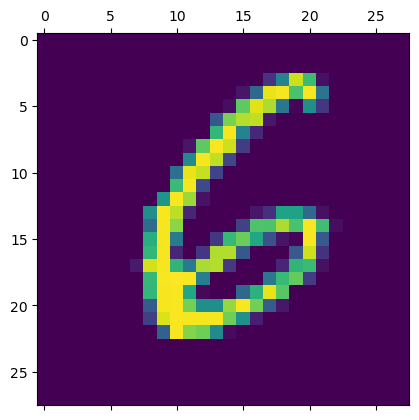

In [10]:
plt.matshow(x_train[1202])

In [11]:
y_train[1202]

6

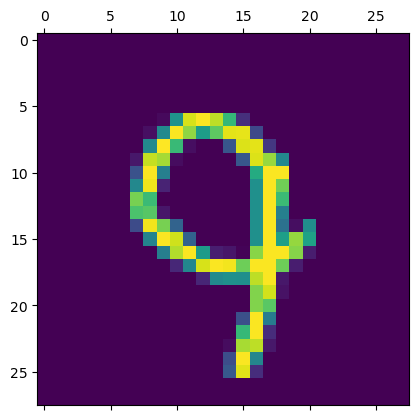

In [12]:
plt.matshow(x_test[999])

In [13]:
y_test[999]

9

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
len(x_train)

60000

In [18]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [19]:
x_test.shape

(10000, 28, 28)

In [20]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [21]:
model=keras.Sequential([
    #input layer with 784 nodes
    #10 indicates possible outcomes
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9257


In [22]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9251


[0.26574426889419556, 0.9251000285148621]

In [23]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.2649435e-02, 4.4225862e-07, 5.3102892e-02, 9.5963335e-01,
       2.1592726e-03, 1.3242440e-01, 1.6087254e-06, 9.9980313e-01,
       1.0214596e-01, 7.6127428e-01], dtype=float32)

In [24]:
import numpy as np
np.argmax(y_predicted[10])

0

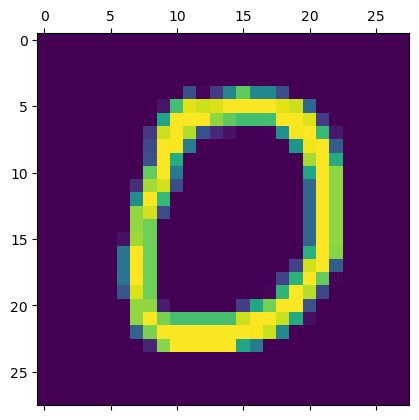

In [25]:
plt.matshow(x_test[10])

In [26]:
y_prediced_labels=[np.argmax(i) for i in y_predicted]
y_prediced_labels[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [27]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    1,    1],
       [   0, 1114,    4,    2,    0,    1,    3,    2,    9,    0],
       [   5,    8,  926,   18,    7,    2,   10,   10,   41,    5],
       [   3,    0,   20,  926,    0,   19,    2,   11,   20,    9],
       [   2,    1,    5,    2,  908,    0,    7,    4,    8,   45],
       [   8,    3,    5,   39,   10,  767,   11,    7,   35,    7],
       [  12,    3,   11,    1,    8,   15,  903,    2,    3,    0],
       [   1,    5,   20,    8,   10,    0,    0,  940,    3,   41],
       [   7,    7,    6,   23,    9,   24,    8,   12,  869,    9],
       [  11,    7,    1,    9,   19,    7,    0,   15,    5,  935]])>

Text(50.722222222222214, 0.5, 'predicted')

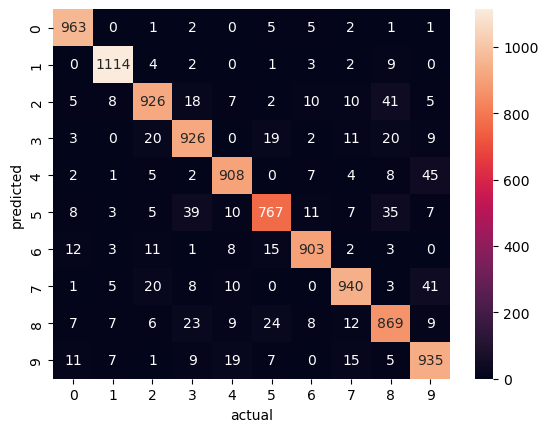

In [29]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediced_labels))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.91      0.86      0.89       892
           6       0.95      0.94      0.95       958
           7       0.94      0.91      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.92     10000



In [31]:
model=keras.Sequential([
    #input layer with 784 nodes
    #100 indicates no. of nodes in hidden layer 1
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    
    #hidden layer 1
#     200 indicates no. of nodes for hidden layer 2
    keras.layers.Dense(200,activation='sigmoid'),
    
    #hidden layer 2
#     10 possible outcomes
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4227 - accuracy: 0.8833
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1688 - accuracy: 0.9495
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1195 - accuracy: 0.9645
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9880
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.027

In [32]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9769


[0.0841376855969429, 0.9768999814987183]

In [33]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([6.7073638e-03, 1.5391019e-01, 3.9600840e-01, 8.8992637e-01,
       1.9178721e-04, 3.2665485e-03, 3.2633253e-08, 9.9999529e-01,
       2.8757942e-03, 3.0368149e-02], dtype=float32)

In [34]:
y_prediced_labels=[np.argmax(i) for i in y_predicted]
y_prediced_labels[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4]

In [35]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    0,    4,    1,    2,    2],
       [   0, 1123,    2,    0,    0,    2,    2,    0,    6,    0],
       [   4,    1, 1001,    3,    4,    1,    6,    6,    6,    0],
       [   0,    0,    3,  989,    0,    5,    0,    6,    3,    4],
       [   0,    0,    2,    2,  958,    0,    9,    4,    1,    6],
       [   2,    0,    0,    5,    1,  876,    4,    1,    1,    2],
       [   2,    2,    0,    1,    1,    3,  949,    0,    0,    0],
       [   1,    3,   10,    4,    1,    0,    0, 1006,    0,    3],
       [   7,    0,    3,    9,    3,    4,    4,    2,  940,    2],
       [   2,    2,    0,    9,   12,    6,    1,   11,    7,  959]])>

Text(50.722222222222214, 0.5, 'predicted')

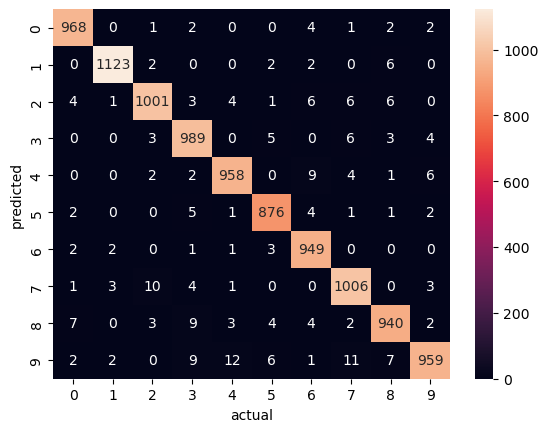

In [36]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediced_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

